# Exploring E-Commerce Data

Dataset yang digunakan pada project ini merupakan dataset dari salah satu modul project-based yang telah saya selesaikan di DQLab Academy. Project ini menggunakan dataset DQLab Store yang berisi transaksi bulan Januari 2019 hingga Mei 2020, dataset yang digunakan terdiri dari:
1. user dataset, berisi detail data pengguna 
2. products dataset, berisi detail data dari produk yang dijual
3. orders dataset, berisi transaksi pembelian dari pembeli ke penjual 
4. order_details dataset, berisi detail barang yang dibeli saat transaksi

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [2]:
user_df = pd.read_csv("data/users.csv", delimiter=';')
product_df = pd.read_csv("data/products.csv", delimiter=';')
order_df = pd.read_csv("data/orders.csv", delimiter=';')
order_detail_df = pd.read_csv("data/order_details.csv", delimiter=';')

## Exploring Data
### product Dataset

In [3]:
product_df.sample(5)

,product_id,desc_product,category,base_price
396,397,Pop Mie Mi Instan Mini Soto Mie 35G,Makanan Instan,3000
338,339,Bihunku Bihun Goreng Special Pedas 60G,Makanan Instan,8000
1095,1096,Leivy Nourishing Shower Cream Royal Jelly + Ho...,Kebersihan Diri,67000
373,374,La Fonte Spaghetti 225G,Makanan Instan,15000
1108,1109,Milky Body Soap (Fragrance) 400mL,Kebersihan Diri,47000


Pada dataset ini terdapat 4 kolom yang terdiri dari:
* product_id : ID produk
* desc_product : nama produk
* category : kategori produk
* base_price : harga asli dari produk

In [4]:
print("Jumlah missing data tiap kolom:\n", product_df.isna().sum())
product_df.describe()

Jumlah missing data tiap kolom:
 product_id      0
desc_product    0
category        0
base_price      0
dtype: int64


,product_id,base_price
count,1145.000000,1145.000000
mean,573.000000,37836.681223
std,330.677335,46108.477098
min,1.000000,2000.000000
25%,287.000000,8000.000000
50%,573.000000,20000.000000
75%,859.000000,49000.000000
max,1145.000000,365000.000000


#### Jumlah Produk per Kategori 
Untuk mendapatkan jumlah produk per kategori, dilakukan **grouping** berdasarkan *category* lalu dihitung jumlah produk tiap kategori

In [5]:
sum_produk_per_kategori = product_df.groupby('category').product_id.count().sort_values(ascending=False)
print('Jumlah produk per kategori: \n',sum_produk_per_kategori)

Jumlah produk per kategori: 
 category
Kebersihan Diri          434
Fresh Food               134
Makanan Instan           133
Pakaian Pria              98
Bahan Makanan             98
Minuman Ringan            97
Vitamin                   49
Pakaian Wanita            49
Makanan Kaleng            22
Aksesoris Wanita          18
Pakaian Muslim Wanita      7
Pakaian Tidur Wanita       6
Name: product_id, dtype: int64


In [6]:
sum_produk_per_kategori = sum_produk_per_kategori.reset_index()
sum_produk_per_kategori

,category,product_id
0,Kebersihan Diri,434
1,Fresh Food,134
2,Makanan Instan,133
3,Pakaian Pria,98
4,Bahan Makanan,98
5,Minuman Ringan,97
6,Vitamin,49
7,Pakaian Wanita,49
8,Makanan Kaleng,22
9,Aksesoris Wanita,18


In [7]:
top_kategori = sum_produk_per_kategori.head(6)
sum_produk_per_kategori['top_category'] = sum_produk_per_kategori['category'].apply(lambda x: x if (x in top_kategori['category'].to_list()) else 'other')
sum_produk_per_kategori

,category,product_id,top_category
0,Kebersihan Diri,434,Kebersihan Diri
1,Fresh Food,134,Fresh Food
2,Makanan Instan,133,Makanan Instan
3,Pakaian Pria,98,Pakaian Pria
4,Bahan Makanan,98,Bahan Makanan
5,Minuman Ringan,97,Minuman Ringan
6,Vitamin,49,other
7,Pakaian Wanita,49,other
8,Makanan Kaleng,22,other
9,Aksesoris Wanita,18,other


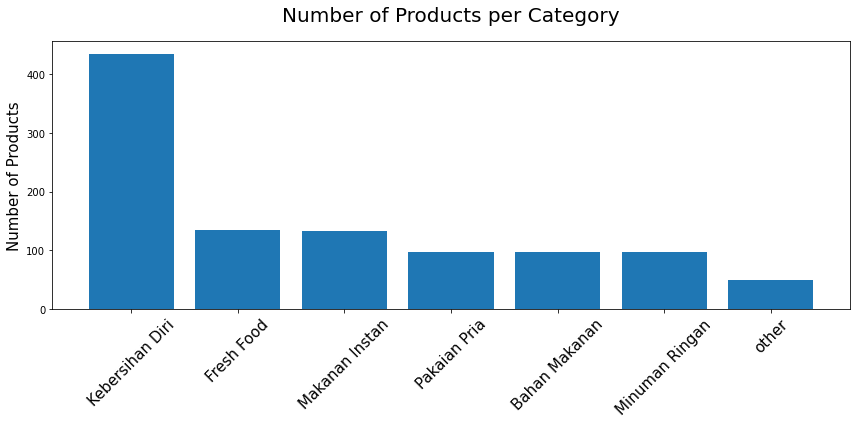

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(sum_produk_per_kategori['top_category'], 
        sum_produk_per_kategori['product_id'])
plt.xticks(rotation=45, fontsize=15)
plt.title("Number of Products per Category", loc='center', fontsize=20, pad=20)
plt.ylabel("Number of Products", fontsize=15)
plt.tight_layout()
plt.savefig('images/total_product_category.png')
plt.show()

#### Sepuluh Produk dengan Base Price Termahal 

In [9]:
produk_termahal = product_df.sort_values('base_price', ascending=False, ignore_index=True).head(10)
produk_termahal

,product_id,desc_product,category,base_price
0,585,Blackmores Bio C 1000mg 150's,Vitamin,365000
1,719,Mom's Recipe Pudding Tart Square 24X24cm,Fresh Food,325000
2,590,Blackmores Glucosamine Sulfate 1500 90's,Vitamin,305000
3,596,Blackmores Pregnancy & Breast-Feeding Gold 120's,Vitamin,295000
4,718,Mom's Recipe Pudding Tart Square 22X22cm,Fresh Food,285000
5,132,EMBA LONG PANT FM316,Pakaian Pria,263000
6,594,Blackmores Odourless Fish Oil 1000 200's,Vitamin,263000
7,856,Mustika Ratu Hand & Body Spray Nourishng Olive...,Kebersihan Diri,245000
8,717,Mom's Recipe Pudding Tart Round 20cm,Fresh Food,230000
9,39,ANNA FAITH LEGGING STRIPE,Pakaian Wanita,225000


#### Sepuluh Produk dengan Base Price Termurah

In [10]:
produk_termurah = product_df.sort_values('base_price', ascending=True, ignore_index=True).head(10)
produk_termurah

,product_id,desc_product,category,base_price
0,333,Ajinomoto Mie Instant Yum Yum Tomyum Udang 70G,Makanan Instan,2000
1,317,Indomie Mie Instant Soto Padang 75G,Makanan Instan,2000
2,318,Indomie Mie Instant Soto Spesial 75G,Makanan Instan,2000
3,319,Sedaap Mie Instant Ayam Bawang Telur 77G,Makanan Instan,2000
4,327,3 Ayam Mie Telor Super Kuning 200G,Makanan Instan,2000
5,66,GAPURA BATIK CRAFT GELANG ETNIK GBC0076,Aksesoris Wanita,2000
6,332,Abc Mie Rebus Selera Pedas Gulai Ayam Pedas 70G,Makanan Instan,2000
7,346,Honig Macaroni Elbow 200G,Makanan Instan,2000
8,350,Indomie Mi Keriting Ayam Panggang 90G,Makanan Instan,2000
9,911,Citra Sabun Mandi Pencerah Kulit Pearl 70G,Kebersihan Diri,2000


### user Dataset

In [11]:
user_df.sample(5)

,user_id,nama_user,kodepos,email
14106,14107,Paulin Purwanti,78498,andrianiemil@pt.net
2535,2536,Prayitna Marpaung,1691,fmandasari@cv.co.id
7601,7602,Padma Waluyo,6089,opudjiastuti@pd.ac.id
10571,10572,Sari Laksmiwati,42065,sabarlazuardi@cv.int
16417,16418,Dr. Violet Laksmiwati,4111,dlazuardi@pt.go.id


Pada dataset ini terdapat 4 kolom yang terdiri dari:
* user_id : ID pengguna
* nama_user : nama pengguna
* kodepos : kodepos alamat utama dari pengguna
* email : email dari pengguna

In [12]:
print("Jumlah missing data tiap kolom:\n", user_df.isna().sum())
user_df.describe()

Jumlah missing data tiap kolom:
 user_id      0
nama_user    0
kodepos      0
email        0
dtype: int64


,user_id,kodepos
count,17936.00000,17936.000000
mean,8968.50000,49773.144179
std,5177.82155,28967.078621
min,1.00000,0.000000
25%,4484.75000,24606.000000
50%,8968.50000,49485.000000
75%,13452.25000,74868.500000
max,17936.00000,99997.000000


### order Dataset

In [13]:
order_df.sample(5)

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
39874,267662,61,4245,30061,660000,0,660000,2019-12-14,NaN,NaN
43190,289318,68,13231,35179,150000,10200,139800,2020-04-12,2020-04-15,2020-04-25
31330,210471,26,13723,35623,1020000,0,1020000,2020-05-11,2020-05-17,2020-05-25
62996,419586,42,60,97658,1524000,0,1524000,2020-01-22,2020-01-24,2020-02-04
67486,449712,66,2149,980,5505000,0,5505000,2020-04-07,2020-04-13,2020-04-25


Pada dataset ini terdapat 10 kolom yang terdiri dari:
* order_id : ID transaksi
* seller_id : ID dari pengguna yang menjual
* buyer_id : ID dari pengguna yang membeli
* kodepos : kodepos alamat pengirimian transaksi (bisa beda dengan alamat utama)
* subtotal : total harga barang sebelum diskon
* discount : diskon dari transaksi
* total : total harga barang setelah dikurangi diskon, yang dibayarkan pembeli
* created_at : tanggal transaksi
* paid_at : tanggal dibayar
* delivery_at : tanggal pengiriman

In [14]:
print("Jumlah missing data tiap kolom:\n", order_df.isna().sum())
order_df.describe()

Jumlah missing data tiap kolom:
 order_id          0
seller_id         0
buyer_id          0
kodepos           0
subtotal          0
discount          0
total             0
created_at        0
paid_at        5046
delivery_at    9790
dtype: int64


,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total
count,74874.000000,74874.000000,74874.000000,74874.000000,7.487400e+04,7.487400e+04,7.487400e+04
mean,249966.290194,34.964808,8989.472941,50130.240805,2.006208e+06,1.621004e+04,1.988183e+06
std,144065.798238,19.907566,5169.815577,28899.309837,2.605957e+06,1.092113e+05,2.583434e+06
min,3.000000,1.000000,1.000000,0.000000,2.000000e+03,0.000000e+00,1.700000e+03
25%,124587.000000,18.000000,4524.000000,25131.000000,3.420000e+05,0.000000e+00,3.400000e+05
50%,250715.000000,35.000000,8994.000000,50002.000000,1.050000e+06,0.000000e+00,1.038000e+06
75%,374152.000000,52.000000,13477.000000,75258.000000,2.658000e+06,0.000000e+00,2.636000e+06
max,498783.000000,69.000000,17936.000000,99997.000000,3.611400e+07,4.602000e+06,3.611400e+07


Pada dataset ini terdapat nilai **NaN** pada kolom *paid_at* dan kolom *delivery_at*, nilai tersebut dapat dipahami sebagai transaksi yang tidak sempurna.

In [15]:
# Merubah format kolom yang berisi tanggal menjadi format datetime

order_df['created_at'] = pd.to_datetime(order_df['created_at'])
order_df['delivery_at'] = pd.to_datetime(order_df['delivery_at'])
order_df['paid_at'] = pd.to_datetime(order_df['paid_at'])
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74874 entries, 0 to 74873
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     74874 non-null  int64         
 1   seller_id    74874 non-null  int64         
 2   buyer_id     74874 non-null  int64         
 3   kodepos      74874 non-null  int64         
 4   subtotal     74874 non-null  int64         
 5   discount     74874 non-null  int64         
 6   total        74874 non-null  int64         
 7   created_at   74874 non-null  datetime64[ns]
 8   paid_at      69828 non-null  datetime64[ns]
 9   delivery_at  65084 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(7)
memory usage: 5.7 MB


#### Jumlah Transaksi per Bulan
Untuk memperoleh jumlah transaksi per bulan, dilakukan perubahan frekuensi data dari frekuensi harian (daily) menjadi frekuensi bulanan (monthly) dan menghitung jumlah order tiap bulan.

In [16]:
transaksi_bulanan = order_df.resample('M', on='created_at').order_id.count()
transaksi_bulanan.index = transaksi_bulanan.index.strftime('%Y-%m')
print('Jumlah transaksi per bulan: \n', transaksi_bulanan)

Jumlah transaksi per bulan: 
 created_at
2019-01      117
2019-02      354
2019-03      668
2019-04      984
2019-05     1462
2019-06     1913
2019-07     2667
2019-08     3274
2019-09     4327
2019-10     5577
2019-11     7162
2019-12    10131
2020-01     5062
2020-02     5872
2020-03     7323
2020-04     7955
2020-05    10026
Name: order_id, dtype: int64


In [17]:
transaksi_bulanan = transaksi_bulanan.reset_index()

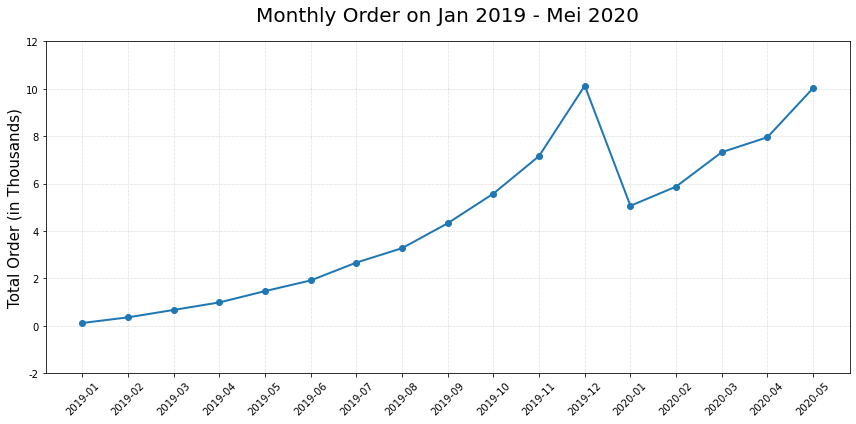

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(transaksi_bulanan['created_at'],
        transaksi_bulanan['order_id'],
        marker='o', linewidth=2)
plt.title('Monthly Order on Jan 2019 - Mei 2020', loc='center', pad=20, fontsize=20)
plt.ylabel('Total Order (in Thousands)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/monthly_order.png')
plt.show()

#### Status Transaksi
* Jumlah transaksi yang tidak dibayar

In [19]:
jumlah_tidak_bayar = order_df['paid_at'].isna().sum()
print("Jumlah transaksi yang tidak dibayar :", jumlah_tidak_bayar)

Jumlah transaksi yang tidak dibayar : 5046


* Jumlah transaksi yang tidak dikirim, baik yang sudah dibayar maupun belum dibayar

In [20]:
jumlah_tidak_kirim = order_df['delivery_at'].isna().sum()
print("Jumlah transaksi yang tidak dikirim :", jumlah_tidak_kirim)

Jumlah transaksi yang tidak dikirim : 9790


* Jumlah transaksi yang sudah dibayar tapi tidak dikirim

In [21]:
index_filter = order_df['paid_at'].notna() & order_df['delivery_at'].isna()
jumlah_bayar_tidak_kirim = order_df.loc[index_filter, 'order_id'].count()

print("Jumlah transaksi yang sudah dibayar tapi tidak dikirim :", jumlah_bayar_tidak_kirim)

Jumlah transaksi yang sudah dibayar tapi tidak dikirim : 4744


* Jumlah transaksi yang dikirim pada hari yang sama dengan tanggal bayar

In [22]:
index_filter = order_df['paid_at'] == order_df['delivery_at']
jumlah = order_df.loc[index_filter, 'order_id'].count()

print("Jumlah transaksi yang dikirim pada hari yang sama dengan tanggal bayar :", jumlah)

Jumlah transaksi yang dikirim pada hari yang sama dengan tanggal bayar : 4588


#### Status User
* Jumlah seluruh user

In [23]:
jumlah_user = user_df['user_id'].nunique()
print("Jumlah seluruh user: ", jumlah_user)

Jumlah seluruh user:  17936


* Jumlah user yang pernah bertransaksi sebagai buyer

In [24]:
jumlah_buyer = order_df['buyer_id'].nunique()
print("Jumlah user yang pernah bertransaksi sebagai buyer: ", jumlah_buyer)

Jumlah user yang pernah bertransaksi sebagai buyer:  17877


* Jumlah user yang pernah bertransaksi sebagai seller

In [25]:
jumlah_seller = order_df['seller_id'].nunique()
print("Jumlah user yang pernah bertransaksi sebagai seller: ", jumlah_seller)

Jumlah user yang pernah bertransaksi sebagai seller:  69


* Jumlah user yang pernah bertransaksi sebagai seller & buyyer

In [26]:
id_buyyer = order_df['buyer_id'].unique()
idx = order_df['seller_id'].isin(id_buyyer)
jumla_buyer_seller = order_df.loc[idx, 'seller_id'].nunique()
print("Jumlah user yang pernah bertransaksi sebagai seller & buyyer: ", jumla_buyer_seller)

Jumlah user yang pernah bertransaksi sebagai seller & buyyer:  69


* Jumlah user yang belum pernah bertransaksi

In [27]:
id_seller = order_df['seller_id'].unique()
id_buyyer_seller = np.append(id_buyyer, id_seller)
idx = ~user_df['user_id'].isin(id_buyyer_seller) 
jumlah_user_nonaktif = user_df.loc[idx, 'user_id'].nunique()
print("Jumlah user yang belum pernah bertransaksi: ", jumlah_user_nonaktif)

Jumlah user yang belum pernah bertransaksi:  59


#### Top Buyer

In [28]:
order_buyer_df = order_df.groupby('buyer_id')['total'].sum().reset_index()
order_buyer_df.columns = ['user_id', 'total']
order_buyer_df

,user_id,total
0,1,20096500
1,2,443000
2,3,10015000
3,4,19928000
4,5,16719000
...,...,...
17872,17932,6518000
17873,17933,17197400
17874,17934,21667000
17875,17935,4610000


In [29]:
user_id_df = user_df[['user_id', 'nama_user', 'email']]
user_id_df

,user_id,nama_user,email
0,1,"Ir. Paris Siregar, S.Sos",dadapsamosir@hotmail.com
1,2,Oliva Zulkarnain,permadiputri@pt.mil.id
2,3,Latika Mustofa,caturanggriawan@pd.go.id
3,4,Elvina Rahmawati,varyani@pd.ac.id
4,5,Tedi Irawan,latuponodaliono@hotmail.com
...,...,...,...
17931,17932,Diana Nuraini,tugimanutami@pt.org
17932,17933,Kamal Sirait,luwar13@perum.sch.id
17933,17934,Cut Tania Simanjuntak,iswahyudirudi@yahoo.com
17934,17935,"R.M. Gamblang Pratiwi, S.E.I",firgantoroyuni@gmail.com


In [30]:
buyer_df = order_buyer_df.join(user_id_df.set_index('user_id'), on='user_id')
buyer_df

,user_id,total,nama_user,email
0,1,20096500,"Ir. Paris Siregar, S.Sos",dadapsamosir@hotmail.com
1,2,443000,Oliva Zulkarnain,permadiputri@pt.mil.id
2,3,10015000,Latika Mustofa,caturanggriawan@pd.go.id
3,4,19928000,Elvina Rahmawati,varyani@pd.ac.id
4,5,16719000,Tedi Irawan,latuponodaliono@hotmail.com
...,...,...,...,...
17872,17932,6518000,Diana Nuraini,tugimanutami@pt.org
17873,17933,17197400,Kamal Sirait,luwar13@perum.sch.id
17874,17934,21667000,Cut Tania Simanjuntak,iswahyudirudi@yahoo.com
17875,17935,4610000,"R.M. Gamblang Pratiwi, S.E.I",firgantoroyuni@gmail.com


In [31]:
buyer_df.sort_values(by='total', ascending=False).head()

,user_id,total,nama_user,email
14363,14411,54102250,Jaga Puspasari,pratamacawisadi@yahoo.com
11097,11140,52743200,"R.A. Yulia Padmasari, S.I.Kom",safitriunggul@pt.co.id
15863,15915,49141800,"Sutan Agus Ardianto, S.Kom",twidiastuti@pt.go.id
2897,2908,49033000,"Septi Melani, S.Ked",yuniaraurora@gmail.com
10315,10355,48868000,Kartika Habibi,siregarbakti@pd.gov


#### Frequnt Buyer

In [32]:
df = order_df.dropna()
df.head(10)

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
0,3,5,4769,32610,900000,0,900000,2019-06-01,2019-06-04,2019-06-12
1,5,23,4276,2674,220000,0,220000,2019-04-02,2019-04-05,2019-04-09
2,8,4,14110,48577,1248000,0,1248000,2019-08-02,2019-08-13,2019-08-20
4,31,46,5318,96740,253000,0,253000,2019-03-12,2019-03-17,2019-03-20
5,33,68,16359,97275,160000,0,160000,2019-07-09,2019-07-14,2019-07-14
6,36,1,6523,68651,156000,0,156000,2019-03-29,2019-04-11,2019-04-13
7,48,44,13167,52839,24000,0,24000,2019-10-20,2019-11-01,2019-11-12
8,58,4,2171,19543,788000,0,788000,2019-08-29,2019-09-08,2019-09-19
9,67,23,3863,8366,6233000,0,6233000,2020-02-17,2020-02-18,2020-02-29
10,72,32,17412,48748,270000,0,270000,2019-05-17,2019-05-19,2019-05-26


In [33]:
non_discount_user = df.groupby('buyer_id')['discount'].sum().reset_index()
idx = non_discount_user['discount'] == 0
non_discount_user = non_discount_user[idx]
non_discount_user = non_discount_user['buyer_id']
non_discount_user

1            2
2            3
3            4
5            6
6            7
         ...  
17720    17931
17721    17932
17723    17934
17724    17935
17725    17936
Name: buyer_id, Length: 12884, dtype: int64

In [34]:
idx = (df['buyer_id'].isin(non_discount_user))
non_discount_order_df = df[idx]
non_discount_order_df.head(10)

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
0,3,5,4769,32610,900000,0,900000,2019-06-01,2019-06-04,2019-06-12
1,5,23,4276,2674,220000,0,220000,2019-04-02,2019-04-05,2019-04-09
2,8,4,14110,48577,1248000,0,1248000,2019-08-02,2019-08-13,2019-08-20
4,31,46,5318,96740,253000,0,253000,2019-03-12,2019-03-17,2019-03-20
5,33,68,16359,97275,160000,0,160000,2019-07-09,2019-07-14,2019-07-14
6,36,1,6523,68651,156000,0,156000,2019-03-29,2019-04-11,2019-04-13
8,58,4,2171,19543,788000,0,788000,2019-08-29,2019-09-08,2019-09-19
9,67,23,3863,8366,6233000,0,6233000,2020-02-17,2020-02-18,2020-02-29
13,87,65,3433,95017,1334000,0,1334000,2020-05-29,2020-06-03,2020-06-14
14,103,65,9797,73801,2116000,0,2116000,2019-12-12,2019-12-13,2019-12-16


In [35]:
order_buyer_df = non_discount_order_df.groupby('buyer_id')['order_id'].nunique().reset_index()
order_buyer_df.columns = ['user_id', 'total']
order_buyer_df

,user_id,total
0,2,1
1,3,3
2,4,1
3,6,2
4,7,1
...,...,...
12879,17931,2
12880,17932,3
12881,17934,7
12882,17935,2


In [36]:
buyer_df = order_buyer_df.join(user_id_df.set_index('user_id'), on='user_id')
buyer_df

,user_id,total,nama_user,email
0,2,1,Oliva Zulkarnain,permadiputri@pt.mil.id
1,3,3,Latika Mustofa,caturanggriawan@pd.go.id
2,4,1,Elvina Rahmawati,varyani@pd.ac.id
3,6,2,Ir. Hartaka Susanti,siregarfebi@perum.int
4,7,1,"Manah Nuraini, M.M.",ira80@gmail.com
...,...,...,...,...
12879,17931,2,Eli Ramadan,bputra@gmail.com
12880,17932,3,Diana Nuraini,tugimanutami@pt.org
12881,17934,7,Cut Tania Simanjuntak,iswahyudirudi@yahoo.com
12882,17935,2,"R.M. Gamblang Pratiwi, S.E.I",firgantoroyuni@gmail.com


In [37]:
buyer_df.sort_values(by='total', ascending=False).head()

,user_id,total,nama_user,email
8957,12476,12,Yessi Wibisono,parmanwaskita@gmail.com
4040,5620,11,Cakrawangsa Habibi,namagaargono@hotmail.com
10269,14309,11,"Diah Nainggolan, S.E.I",idaadriansyah@pt.biz.id
5431,7543,11,Laras Puspasari,rahmat51@pd.mil.id
10166,14172,11,"Ophelia Oktaviani, S.H.",mutiawidodo@ud.go.id


#### Big Frequent Buyer 2020

In [49]:
idx = order_df['created_at'] > '2019-12-31'
order_2020 = df[idx].reset_index()
order_2020

<ipython-input-49-78de6d991dad>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  order_2020 = df[idx].reset_index()


,index,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
0,9,67,23,3863,8366,6233000,0,6233000,2020-02-17,2020-02-18,2020-02-29
1,13,87,65,3433,95017,1334000,0,1334000,2020-05-29,2020-06-03,2020-06-14
2,15,104,8,8799,98276,2760000,0,2760000,2020-02-03,2020-02-09,2020-02-13
3,17,107,12,17394,87181,4798000,0,4798000,2020-04-08,2020-04-20,2020-04-26
4,18,110,31,12954,21786,836000,114000,722000,2020-04-25,2020-04-27,2020-05-08
...,...,...,...,...,...,...,...,...,...,...,...
31436,74867,498754,55,8193,13751,2794000,0,2794000,2020-04-17,2020-05-01,2020-05-05
31437,74869,498764,29,9092,500,1717000,0,1717000,2020-01-16,2020-01-22,2020-01-24
31438,74870,498768,20,8598,84920,2170000,0,2170000,2020-04-03,2020-04-16,2020-04-20
31439,74871,498772,3,4439,36221,78000,0,78000,2020-04-02,2020-04-04,2020-04-14


In [50]:
import datetime

order_2020['month'] = order_2020['created_at'].apply(lambda x: datetime.datetime.strftime(x, "%Y-%m"))

In [51]:
big_freq_buyer = order_2020.groupby(['buyer_id', 'month']).agg({
    'order_id' : 'nunique',
    'total' : 'mean'
})
big_freq_buyer = big_freq_buyer.reset_index()
big_freq_buyer

,buyer_id,month,order_id,total
0,1,2020-02,1,2116500
1,1,2020-03,1,6232000
2,1,2020-05,1,4654000
3,2,2020-02,1,143000
4,3,2020-05,1,2202000
...,...,...,...,...
29996,17933,2020-04,1,6834400
29997,17934,2020-03,1,2446000
29998,17934,2020-04,1,441000
29999,17935,2020-05,1,90000


In [52]:
big_freq_buyer.columns = ['user_id', 'month', 'jumlah_order', 'total']
idx = big_freq_buyer['total'] >= 1_000_000
big_freq_buyer = big_freq_buyer[idx]#.reset_index()

In [53]:
big_buyer_df = big_freq_buyer.join(user_id_df.set_index('user_id'), on='user_id')
big_buyer_df

,user_id,month,jumlah_order,total,nama_user,email
0,1,2020-02,1,2116500,"Ir. Paris Siregar, S.Sos",dadapsamosir@hotmail.com
1,1,2020-03,1,6232000,"Ir. Paris Siregar, S.Sos",dadapsamosir@hotmail.com
2,1,2020-05,1,4654000,"Ir. Paris Siregar, S.Sos",dadapsamosir@hotmail.com
4,3,2020-05,1,2202000,Latika Mustofa,caturanggriawan@pd.go.id
6,8,2020-02,1,5563000,"Hadi Habibi, S.Gz",yonosirait@pt.net.id
...,...,...,...,...,...,...
29992,17930,2020-02,1,2893000,"Gina Siregar, S.Pt",sakanababan@cv.net
29994,17932,2020-05,1,2901000,Diana Nuraini,tugimanutami@pt.org
29996,17933,2020-04,1,6834400,Kamal Sirait,luwar13@perum.sch.id
29997,17934,2020-03,1,2446000,Cut Tania Simanjuntak,iswahyudirudi@yahoo.com


In [54]:
list_ = [12854, 11195, 10028, 3185, 11998]

idx = big_buyer_df['user_id'].isin(list_)
big_buyer_df[idx]

,user_id,month,jumlah_order,total,nama_user,email
5244,3185,2020-02,1,13500000,Vino Puspita,bzulkarnain@yahoo.com
5245,3185,2020-04,1,9634000,Vino Puspita,bzulkarnain@yahoo.com
5246,3185,2020-05,1,2587400,Vino Puspita,bzulkarnain@yahoo.com
16692,10028,2020-05,1,27136000,Eli Yulianti,lputra@pd.gov
18650,11195,2020-02,1,2831000,Respati Melani,fnainggolan@hotmail.com
18651,11195,2020-03,1,6637000,Respati Melani,fnainggolan@hotmail.com
18652,11195,2020-04,2,10780500,Respati Melani,fnainggolan@hotmail.com
18653,11195,2020-05,1,4062000,Respati Melani,fnainggolan@hotmail.com
20005,11998,2020-01,1,3328400,Ian Kurniawan,dyulianti@gmail.com
20006,11998,2020-02,1,5978000,Ian Kurniawan,dyulianti@gmail.com


### order_detail Dataset

In [44]:
order_detail_df.sample(5)

,order_detail_id,order_id,product_id,price,quantity
86483,832009,232106,275,8000,2
38590,368534,103017,234,14000,36
70660,683050,190703,291,21000,24
58006,558405,155938,335,6000,41
104989,1007542,281147,854,6000,24


Pada dataset ini terdapat 5 kolom yang terdiri dari:
* order_detail_id : ID table ini
* order_id : ID dari transaksi
* product_id : ID dari masing-masing produk transaksi
* price : harga barang masing-masing produk
* quantity : jumlah barang yang dibeli dari masing-masing produk

In [45]:
print("Jumlah missing data tiap kolom:\n", order_detail_df.isna().sum())
order_detail_df.describe()

Jumlah missing data tiap kolom:
 order_detail_id    0
order_id           0
product_id         0
price              0
quantity           0
dtype: int64


,order_detail_id,order_id,product_id,price,quantity
count,1.874520e+05,187452.000000,187452.000000,187452.000000,187452.000000
mean,8.971103e+05,250250.740920,576.543729,37391.508226,21.472249
std,5.164502e+05,143957.840873,329.594746,45662.642083,12.113271
min,5.000000e+00,3.000000,1.000000,2000.000000,1.000000
25%,4.469048e+05,124963.000000,288.000000,8000.000000,11.000000
50%,8.995105e+05,250970.000000,581.000000,20000.000000,21.000000
75%,1.342075e+06,374239.750000,861.000000,48000.000000,32.000000
max,1.789270e+06,498783.000000,1145.000000,365000.000000,42.000000


#### Sepuluh Produk Terlaris
Untuk memperoleh 10 produk terlalris, dilakukan **grouping** berdasarkan *product_id* lalu dihitung jumlah *quantity* order.

In [46]:
produk_terlaris_df = order_detail_df.groupby('product_id').agg({
    'quantity' : 'sum'
})
produk_terlaris_df = produk_terlaris_df.sort_values('quantity', ascending=False)

id_produk_terlaris = np.array(produk_terlaris_df.index)

index_filter = product_df['product_id'].isin(id_produk_terlaris)
produk_terlaris = product_df.loc[index_filter, 'product_id':'category'].reset_index(drop=True)

produk_terlaris = produk_terlaris_df.join(produk_terlaris.set_index('product_id'))
produk_terlaris.head(10)

,quantity,desc_product,category
product_id,,,
983,6270,Vaseline Lotion Healthy White Uv Lightening 20...,Kebersihan Diri
166,6119,RIDER CELANA ACTIVE WEAR 3IN1 R315B,Pakaian Pria
805,5867,Big Soft Drink Strawberry 3.1L,Minuman Ringan
532,5849,Formula Pasta Gigi + Sikat Gigi Sparkling Whit...,Kebersihan Diri
41,5775,LEGGING WORLD JEGGING LW 11,Pakaian Wanita
162,5715,RIDER CELANA SUPER RIDER R321B,Pakaian Pria
529,5689,Fit-U-Mask Masker Anak 5'S,Kebersihan Diri
594,5674,Blackmores Odourless Fish Oil 1000 200's,Vitamin
868,5662,Ultra Hand Sanitizer Spray 100Ml,Kebersihan Diri


#### Produk yang Terjual per Kategori

In [47]:
sum_order_per_kategori = produk_terlaris
sum_order_per_kategori['top_category'] = sum_order_per_kategori['category'].apply(lambda x: x if (x in top_kategori['category'].to_list()) else 'other')
sum_order_per_kategori = produk_terlaris.groupby('top_category')['quantity'].sum().reset_index()
sum_order_per_kategori

,top_category,quantity
0,Bahan Makanan,358630
1,Fresh Food,481716
2,Kebersihan Diri,1529986
3,Makanan Instan,452330
4,Minuman Ringan,349591
5,Pakaian Pria,329232
6,other,523531


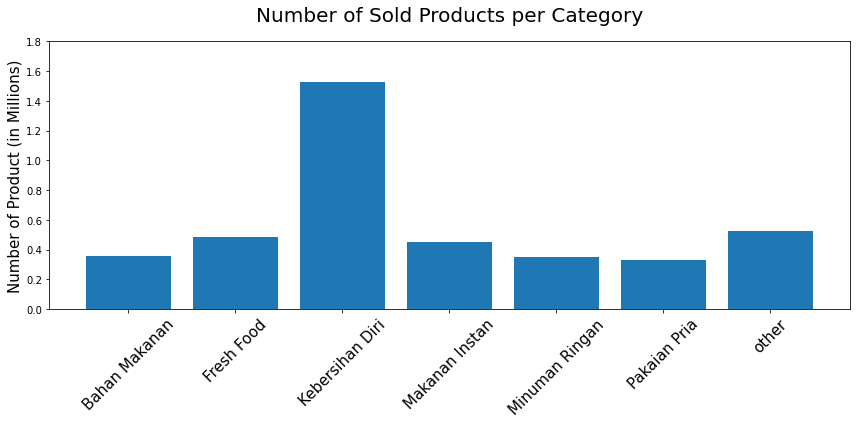

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(sum_order_per_kategori['top_category'], 
        sum_order_per_kategori['quantity'])
plt.xticks(rotation=45, fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(float))
plt.title("Number of Sold Products per Category", loc='center', fontsize=20, pad=20)
plt.ylabel("Number of Product (in Millions)", fontsize=15)
plt.tight_layout()
plt.savefig('images/order_amount_category.png')
plt.show()

In [89]:
df = order_df.drop('delivery_at', axis=1)
df = df.dropna()
df['month'] = df['created_at'].apply(lambda x: datetime.datetime.strftime(x, "%Y-%m"))
idx = df['month'] == '2019-12'
des_order_id = df[idx]
des_order_id = des_order_id[['order_id', 'month']]
des_order_id

,order_id,month
14,103,2019-12
24,155,2019-12
29,192,2019-12
33,235,2019-12
46,312,2019-12
...,...,...
74839,498575,2019-12
74848,498624,2019-12
74850,498633,2019-12
74855,498668,2019-12


In [90]:
des_order = des_order_id.join(order_detail_df.set_index('order_id'), on='order_id')
des_order

,order_id,month,order_detail_id,product_id,price,quantity
14,103,2019-12,319,747,22000,26
14,103,2019-12,320,835,5000,11
14,103,2019-12,321,835,5000,11
14,103,2019-12,322,1049,33000,42
14,103,2019-12,323,386,6000,8
...,...,...,...,...,...,...
74848,498624,2019-12,1788683,194,30000,17
74850,498633,2019-12,1788703,304,2000,30
74855,498668,2019-12,1788823,55,80000,8
74855,498668,2019-12,1788824,327,2000,5


In [101]:
prod_id_des_order = des_order.groupby('product_id')['quantity'].sum().reset_index()
prod_id_des_order = prod_id_des_order.sort_values(by='quantity', ascending=False).head(10)
prod_id_des_order

,product_id,quantity
595,603,1148
70,71,1124
472,480,1118
1020,1038,1016
768,780,975
1111,1132,957
162,166,938
270,275,918
248,253,914
542,550,905


In [102]:
prod_id = prod_id_des_order['product_id']

idx = product_df['product_id'].isin(prod_id)
product_df[idx]

,product_id,desc_product,category,base_price
70,71,QUEEN CEFA BRACELET LEATHER,Aksesoris Wanita,45000
165,166,RIDER CELANA ACTIVE WEAR 3IN1 R315B,Pakaian Pria,71000
252,253,Ajinomoto Bumbu Nasi Goreng Sajiku Ayam 20G,Bahan Makanan,10000
274,275,Bango Kecap Manis Refill 220Ml,Bahan Makanan,8000
479,480,Close Up Pasta Gigi White Attraction Natural G...,Kebersihan Diri,22000
549,550,Lactacyd Daily Feminine Hygiene Herbal Clean &...,Kebersihan Diri,12000
602,603,Cdr Vitamin C 10'S,Vitamin,50000
779,780,Coolant Cooling Mountain Water Extract Crysant...,Minuman Ringan,5000
1037,1038,Fres & Natural Fragrance Mist Hijab Fresh Cott...,Kebersihan Diri,11000
1131,1132,Nivea Deo Roll On Men Deep 50Ml,Kebersihan Diri,19000
